In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
image = cv2.cvtColor(cv2.imread('engine.jpg'), cv2.COLOR_BGR2RGB)

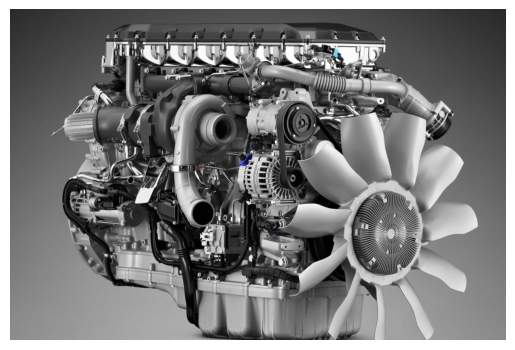

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )
plt.axis('off')
plt.show()

# фільтр Собеля

In [7]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel = cv2.filter2D(image_gray, -1, x_kernel) + cv2.filter2D(image_gray, -1, y_kernel)

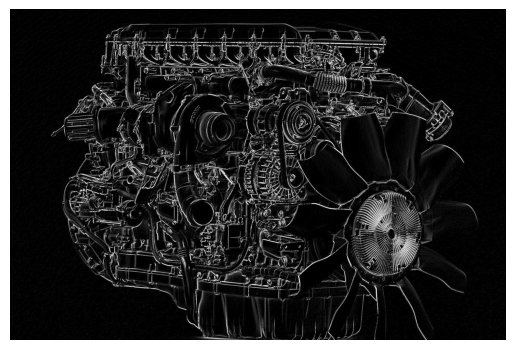

In [11]:
plt.imshow(sobel, cmap='gray')
plt.axis('off')
plt.show()

# фільтр Canny

In [9]:
canny = cv2.Canny(image_gray, 50, 150)

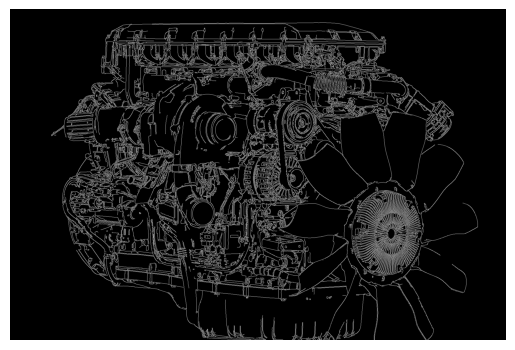

In [12]:
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()

# фільтр Робертса

In [53]:
x_kernel = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
y_kernel = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]])

filtered_img_x = cv2.filter2D(image, -1, x_kernel)
filtered_img_y = cv2.filter2D(image, -1, y_kernel)

roberts_image = cv2.addWeighted(filtered_img_x, 0.5, filtered_img_y, 0.5, 0)

# roberts_image = np.sqrt(np.square(filtered_img_x) + np.square(filtered_img_y))

# roberts_image= (roberts_image / 65535.0) * 255.0

In [54]:
roberts_image = (roberts_image - np.mean(roberts_image)) / np.std(roberts_image)
roberts_image = (roberts_image - np.min(roberts_image)) / (np.max(roberts_image) - np.min(roberts_image))

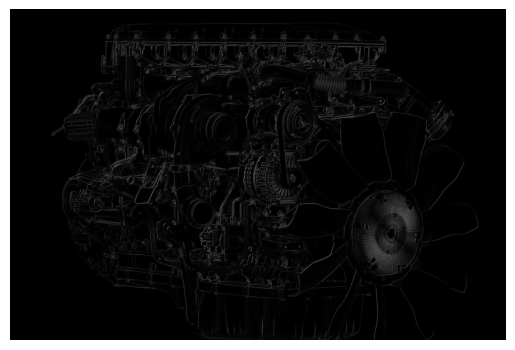

In [55]:
plt.imshow(roberts_image, cmap='gray')
plt.axis('off')
plt.show()

**Фільтри Собеля, Кенні та Робертса є методами для виділення границь на зображенні. Фільтр Робертса є найпростішим та швидким, але він чутливий до шуму. Фільтр Собеля дає більш точні результати, але може бути чутливим до шуму. Фільтр Кенні працює набагато краще за Робертса та Собеля, але він може бути чутливим до шуму та довгих ліній, що може призводити до помилкових результатів. Вибір методу залежить від характеристик зображення та вимог до точності виявлення границь.**